Столкнулся в [лекции Райгородского](https://www.youtube.com/watch?v=-s-YbmgLxMw&list=PLthfp5exSWEr8tRK-Yf-i9aXgcFJ-O16d&index=6&ab_channel=%D0%94%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%D0%9C%D0%A4%D0%A2%D0%98) с мыслью о том, что нулевой коэффициент корреляции не говорит об отсутствии взаимосвязи между переменными. Решил поисследовать вопрос и на примере окружности узнать как ведет себя коэффициент.

Если описывать задачу математически, то есть:
 Ω = [0, 2π],
sin(ω) и cos(ω)  в качестве случайных величин (причем sin(ω)^2 + cos(ω)^2 = 1)
Логически понимаем, что связь есть и переменные могут определяться друг через друга. Но корреляция этого не замечает)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Function for calculate correlations by different methods

def correlateCalc(a, b):
  methods = ['pearson', 'spearman', 'kendall']
  for m in methods:
    print(m, "%.16f" % a.corr(b, method=m))

###Корреляция в линейно зависимом распределении

In [3]:
#https://www.kaggle.com/competitions/home-data-for-ml-course/data
df = pd.read_csv('drive/MyDrive/MathExperiments/HousePrediction_train.csv')

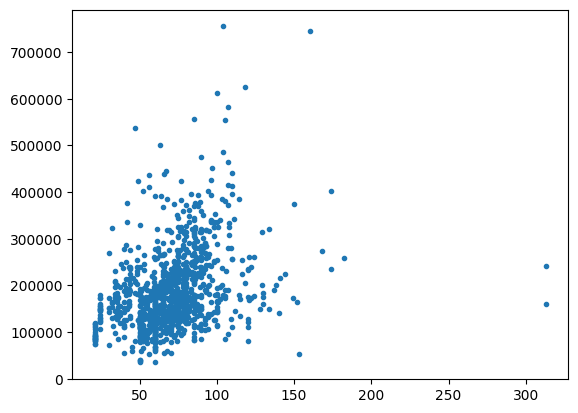

In [4]:
plt.scatter(x = df['LotFrontage'], y = df['SalePrice'], marker='.')
plt.rcParams["figure.figsize"] = (6,4)

In [5]:
# LotFrontage - площадь дома
# SalePrice - цена дома
correlateCalc(df['LotFrontage'], df['SalePrice'])

pearson 0.3517990965706780
spearman 0.4090755179546496
kendall 0.2903612449017869


### Корреляция в функционально зависимых переменных с переменной линейной связью
  На примере окружности (синус и косинус)

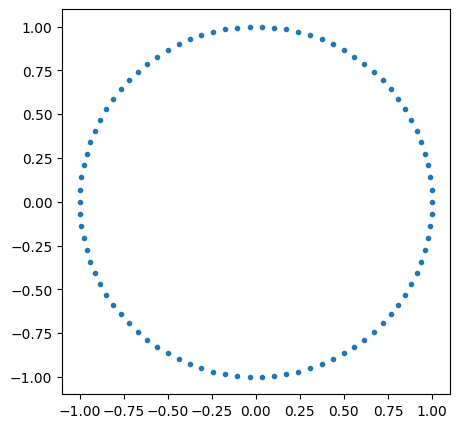

In [190]:
sinValues = pd.Series(map(lambda x: math.sin(math.radians(x*4)), list(range(90))))
cosValues = pd.Series(map(lambda x: math.cos(math.radians(x*4)), list(range(90))))

plt.scatter(x = cosValues, y = sinValues, marker='.')
plt.rcParams["figure.figsize"] = (4,5)

In [191]:
correlateCalc(cosValues, sinValues)

pearson 0.0000000000000000
spearman -0.0004733484256180
kendall -0.0007509386968673


### Корреляция на ограниченном участке
Здесь корреляция присутствует, т.к. рост/убыль cos и sin монотонны и не меняют направление

In [200]:
cossinDF = pd.DataFrame(dict(cosValues = cosValues, sinValues = sinValues))
cossinDF = cossinDF.loc[(cossinDF['cosValues'] >= 0) & (cossinDF['sinValues'] >= 0)]

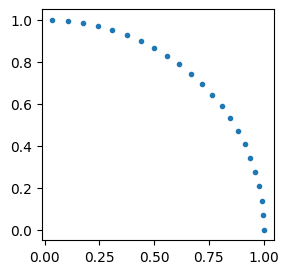

In [202]:
plt.scatter(x = cossinDF['cosValues'], y = cossinDF['sinValues'], marker='.')
plt.rcParams["figure.figsize"] = (3,3)

In [203]:
correlateCalc(cossinDF['cosValues'], cossinDF['sinValues'])

pearson -0.9151426652281065
spearman -1.0000000000000000
kendall -1.0000000000000000


###Ложная корреляция
Ниже пример, где в среднее значение sin при движении cos от -1 до 2 растет. При этом реальная связь переменных описывается как две наложенные окружности. Хоть корреляция показывает умеренную связь, но эти выводы основаны на концептуально ошибочном понимании связи sin и cos.

In [241]:
cossinDF1 = pd.DataFrame(dict(cosValues = cosValues, sinValues = sinValues))
cossinDF2 = cossinDF1 + 1
cossinDF3 = pd.concat([cossinDF1, cossinDF2], ignore_index=True)

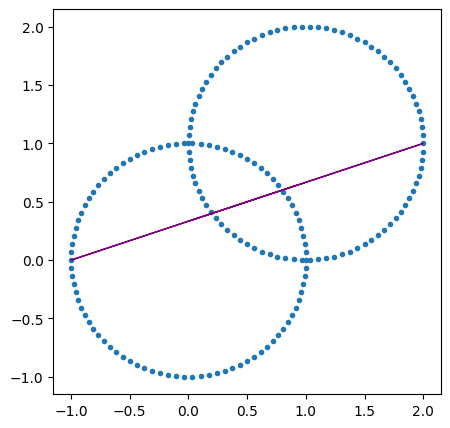

In [242]:
plt.scatter(x = cossinDF3['cosValues'], y = cossinDF3['sinValues'], marker='.')
plt.rcParams["figure.figsize"] = (5,5)

#calculate equation for trendline
#взял из инета
z = np.polyfit(cossinDF3['cosValues'], cossinDF3['sinValues'], 1 )
p = np.poly1d(z)

#add trendline to plot
plt.plot(cossinDF3['sinValues'], p(cossinDF3['sinValues']), color="purple", linewidth= 1)

In [243]:
correlateCalc(cossinDF3['cosValues'], cossinDF3['sinValues'])

pearson 0.3333333333333337
spearman 0.2908740533152116
kendall 0.1923770474306298
